In [1]:
# Verificação e instalação de dependências
import sys
import subprocess
import pickle

def check_and_install_packages():
    """
    Verifica e instala pacotes necessários se houver problemas de compatibilidade
    """
    required_packages = [
        'numpy>=1.24.0',
        'pandas>=1.5.0',
        'scikit-learn>=1.3.0',
        'matplotlib>=3.7.0',
        'seaborn>=0.12.0'
    ]
    
    for package in required_packages:
        try:
            if 'numpy' in package:
                import numpy as np
                print(f"✅ NumPy version: {np.__version__}")
            elif 'pandas' in package:
                import pandas as pd
                print(f"✅ Pandas version: {pd.__version__}")
            elif 'scikit-learn' in package:
                import sklearn
                print(f"✅ Scikit-learn version: {sklearn.__version__}")
            elif 'matplotlib' in package:
                import matplotlib
                print(f"✅ Matplotlib version: {matplotlib.__version__}")
            elif 'seaborn' in package:
                import seaborn as sns
                print(f"✅ Seaborn version: {sns.__version__}")
        except ImportError as e:
            print(f"❌ Erro ao importar {package}: {e}")
            print(f"🔄 Instalando {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
    print("🎉 Todas as dependências estão funcionando corretamente!")

# Executar verificação
try:
    check_and_install_packages()
except Exception as e:
    print(f"⚠️ Problema detectado: {e}")
    print("🔄 Reinstalando NumPy especificamente...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--force-reinstall", "numpy==1.24.4"])

✅ NumPy version: 2.3.3
✅ Pandas version: 2.3.3
✅ Scikit-learn version: 1.7.2
✅ Matplotlib version: 3.10.7
✅ Seaborn version: 0.13.2
🎉 Todas as dependências estão funcionando corretamente!


# Análise de Ganho de Informação e Mutual Information
O ganho de informação é realizado no dataset de treino
Este notebook calcula o ganho de informação e mutual information para o dataset SVM.
- **Ganho de Informação**: Mede a redução na entropia após dividir o dataset com base em um atributo
- **Mutual Information**: Mede a dependência mútua entre duas variáveis

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import warnings
import pickle
warnings.filterwarnings('ignore')

In [3]:
#Variáveis globais
arq_dataset_pkl = '../dataset/svm.pkl'
nome_dataset = 'svm'

In [4]:
# Carregar os datasets de teste, treino e validação do arquivo pickle
print("📂 Carregando datasets preprocessados...")


import pickle
import numpy as np
import pandas as pd

# Verificar se o arquivo existe
import os
if not os.path.exists(arq_dataset_pkl):
    print(f"❌ Arquivo pickle não encontrado: {arq_dataset_pkl}")
    print("🔄 Executando carregamento direto do CSV...")
    # Carregar diretamente do CSV se o pickle não existir
    raise FileNotFoundError("Pickle não encontrado")

# Carregar o arquivo pickle
with open(arq_dataset_pkl, 'rb') as f:
    datasets = pickle.load(f)

# Extrair os datasets
X_train = datasets['X_train']
X_test = datasets['X_test']
X_val = datasets['X_val']
y_train = datasets['y_train']
y_test = datasets['y_test']
y_val = datasets['y_val']
X_train_scaled = datasets['X_train_scaled']
X_test_scaled = datasets['X_test_scaled']
X_val_scaled = datasets['X_val_scaled']
classes_mapping = datasets['classes_mapping']

print("✅ Datasets carregados com sucesso!")
print(f"   • X_train shape: {X_train.shape}")
print(f"   • X_test shape: {X_test.shape}")
print(f"   • X_val shape: {X_val.shape}")
print(f"   • Classes mapping: {classes_mapping}")

# Usar os dados preprocessados para análise
print("\n📊 Usando dados preprocessados para análise de ganho de informação...")

# Para o ganho de informação, vamos usar X_train e y_train
X_for_analysis = pd.DataFrame(X_train)
y_for_analysis = y_train

print(f"   • Dados para análise: {X_for_analysis.shape}")
print(f"   • Target para análise: {len(y_for_analysis)} amostras")



📂 Carregando datasets preprocessados...


KeyError: 'X_train_scaled'

In [ ]:
# Verificação dos dados carregados
print("📊 Verificando dados preprocessados carregados...")

print(f"\n🔍 Informações dos dados de treinamento:")
print(f"   • Tipo de X_train: {type(X_train)}")
print(f"   • Tipo de y_train: {type(y_train)}")

if hasattr(X_train, 'shape'):
    print(f"   • Dimensões X_train: {X_train.shape}")
if hasattr(y_train, 'shape'):
    print(f"   • Dimensões y_train: {y_train.shape}")
elif hasattr(y_train, '__len__'):
    print(f"   • Tamanho y_train: {len(y_train)}")

print(f"\n📋 Estatísticas básicas:")
if isinstance(X_train, pd.DataFrame):
    print(f"   • Colunas em X_train: {len(X_train.columns)}")
    print(f"   • Primeiras colunas: {list(X_train.columns[:5])}")
elif isinstance(X_train, np.ndarray):
    print(f"   • X_train é um numpy array com {X_train.shape[1]} features")
    
print(f"   • Classes únicas em y_train: {np.unique(y_train)}")
print(f"   • Balanceamento das classes:")

unique, counts = np.unique(y_train, return_counts=True)
for class_val, count in zip(unique, counts):
    percentage = (count / len(y_train)) * 100
    print(f"     - Classe {class_val}: {count:,} amostras ({percentage:.1f}%)")

print("\n✅ Dados prontos para análise de ganho de informação!")

📊 Verificando dados preprocessados carregados...

🔍 Informações dos dados de treinamento:
   • Tipo de X_train: <class 'pandas.core.frame.DataFrame'>
   • Tipo de y_train: <class 'numpy.ndarray'>
   • Dimensões X_train: (32259, 122)
   • Dimensões y_train: (32259,)

📋 Estatísticas básicas:
   • Colunas em X_train: 122
   • Primeiras colunas: ['mean_os_cpu_ctx_switches', 'mean_os_cpu_guest', 'mean_os_cpu_guest_nice', 'mean_os_cpu_idle', 'mean_os_cpu_interrupts']
   • Classes únicas em y_train: [0 1]
   • Balanceamento das classes:
     - Classe 0: 18,264 amostras (56.6%)
     - Classe 1: 13,995 amostras (43.4%)

✅ Dados prontos para análise de ganho de informação!


## Funções para Cálculo de Ganho de Informação

O ganho de informação é calculado como:
**IG(S, A) = H(S) - H(S|A)**

Onde:
- H(S) é a entropia do conjunto original
- H(S|A) é a entropia condicional após a divisão pelo atributo A

In [ ]:
def calculate_entropy(y):
    """
    Calcula a entropia de um vetor de rótulos
    """
    if len(y) == 0:
        return 0
    
    # Conta a frequência de cada classe
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Calcula a entropia
    entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy_value

def calculate_information_gain(X_feature, y):
    """
    Calcula o ganho de informação para um atributo específico
    """
    # Entropia total do conjunto
    total_entropy = calculate_entropy(y)
    
    # Valores únicos do atributo
    unique_values = np.unique(X_feature)
    
    # Entropia condicional
    weighted_entropy = 0
    for value in unique_values:
        # Índices onde o atributo tem esse valor
        indices = X_feature == value
        subset_y = y[indices]
        
        # Peso da subdivisão
        weight = len(subset_y) / len(y)
        
        # Entropia da subdivisão
        subset_entropy = calculate_entropy(subset_y)
        
        # Adiciona à entropia ponderada
        weighted_entropy += weight * subset_entropy
    
    # Ganho de informação
    information_gain = total_entropy - weighted_entropy
    return information_gain

def calculate_information_gain_ratio(X_feature, y):
    """
    Calcula a razão do ganho de informação (Information Gain Ratio)
    """
    ig = calculate_information_gain(X_feature, y)
    
    # Entropia intrínseca do atributo
    unique_values, counts = np.unique(X_feature, return_counts=True)
    probabilities = counts / len(X_feature)
    intrinsic_entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    
    # Evita divisão por zero
    if intrinsic_entropy == 0:
        return 0
    
    return ig / intrinsic_entropy

In [ ]:
# Preparação dos dados
print("Preparando os dados...")

# Usar dados preprocessados já carregados
# X_train e y_train já estão disponíveis do carregamento do pickle
print("Usando dados preprocessados do arquivo pickle...")

# Verificar tipos de dados disponíveis
print(f"Tipo de X_train: {type(X_train)}")
print(f"Tipo de y_train: {type(y_train)}")

# Converter para DataFrame se necessário para análise
if isinstance(X_train, np.ndarray):
    print("Convertendo X_train (numpy array) para DataFrame...")
    X = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
else:
    X = X_train.copy()

# Usar y_train diretamente
y = y_train.copy()

print(f"\nShape das features: {X.shape}")
print(f"Shape do target: {y.shape}")

# Verificar valores únicos no target
if hasattr(y, 'nunique'):
    print(f"Valores únicos no target: {y.nunique()}")
    print(f"Distribuição do target:\n{y.value_counts()}")
else:
    unique_values, counts = np.unique(y, return_counts=True)
    print(f"Valores únicos no target: {len(unique_values)}")
    print(f"Distribuição do target:")
    for val, count in zip(unique_values, counts):
        print(f"  {val}: {count}")

print("\n✅ Dados preparados para análise de ganho de informação!")

Preparando os dados...
Colunas disponíveis:
0: mean_os_cpu_ctx_switches
1: mean_os_cpu_guest
2: mean_os_cpu_guest_nice
3: mean_os_cpu_idle
4: mean_os_cpu_interrupts
5: mean_os_cpu_iowait
6: mean_os_cpu_irq
7: mean_os_cpu_nice
8: mean_os_cpu_soft_interrupts
9: mean_os_cpu_softirq
10: mean_os_cpu_steal
11: mean_os_cpu_syscalls
12: mean_os_cpu_system
13: mean_os_cpu_user
14: mean_os_disk_discard_io
15: mean_os_disk_discard_merges
16: mean_os_disk_discard_sectors
17: mean_os_disk_discard_ticks
18: mean_os_disk_in_flight
19: mean_os_disk_io_ticks
20: mean_os_disk_read_io
21: mean_os_disk_read_merge
22: mean_os_disk_read_sectors
23: mean_os_disk_read_ticks
24: mean_os_disk_time_in_queue
25: mean_os_disk_write_io
26: mean_os_disk_write_merge
27: mean_os_disk_write_sectors
28: mean_os_disk_write_ticks
29: mean_os_mem_nr_active_anon
30: mean_os_mem_nr_active_file
31: mean_os_mem_nr_inactive_anon
32: mean_os_mem_nr_inactive_file
33: mean_os_mem_nr_mapped
34: mean_os_mem_pgfault
35: mean_os_mem_p

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

## Cálculo do Ganho de Informação

Agora vamos calcular o ganho de informação para cada feature em relação à variável alvo.

In [ ]:
# Cálculo do ganho de informação para cada feature
print("Calculando ganho de informação...")

# Para features contínuas, vamos discretizá-las primeiro
def discretize_continuous_features(X, n_bins=10):
    """
    Discretiza features contínuas em bins
    """
    X_discrete = X.copy()
    
    for column in X.columns:
        if X[column].dtype in ['float64', 'int64'] and X[column].nunique() > 20:
            # Discretiza em bins
            X_discrete[column] = pd.cut(X[column], bins=n_bins, labels=False)
    
    return X_discrete

# Discretiza as features se necessário
X_discrete = discretize_continuous_features(X)

# Calcula o ganho de informação para cada feature
information_gains = {}
information_gain_ratios = {}

print(f"Processando {len(X_discrete.columns)} features...")

for i, column in enumerate(X_discrete.columns):
    try:
        # Remove valores NaN se houver
        if isinstance(X_discrete[column], pd.Series):
            mask = ~pd.isna(X_discrete[column])
        else:
            mask = ~np.isnan(X_discrete[column])
        
        # Para y, verificar se é pandas Series ou numpy array
        if isinstance(y, pd.Series):
            mask = mask & ~pd.isna(y)
            y_clean = y[mask].values if hasattr(y[mask], 'values') else y[mask]
        else:
            # y é numpy array
            if len(y.shape) > 0:
                mask = mask & ~np.isnan(y) if y.dtype.kind == 'f' else mask
            y_clean = y[mask]
        
        # Para X_discrete[column]
        feature_clean = X_discrete[column][mask].values if hasattr(X_discrete[column][mask], 'values') else X_discrete[column][mask]
        
        if len(feature_clean) > 0 and len(y_clean) > 0:
            ig = calculate_information_gain(feature_clean, y_clean)
            igr = calculate_information_gain_ratio(feature_clean, y_clean)
            
            information_gains[column] = ig
            information_gain_ratios[column] = igr
        else:
            print(f"   ⚠️ Feature {column} ignorada (dados insuficientes)")
            
        # Progress indicator
        if (i + 1) % 50 == 0:
            print(f"   Processadas {i + 1}/{len(X_discrete.columns)} features...")
            
    except Exception as e:
        print(f"   ❌ Erro na feature {column}: {e}")
        continue

print(f"\n✅ Processamento concluído!")
print(f"   • Features processadas com sucesso: {len(information_gains)}")
print(f"   • Features com erro: {len(X_discrete.columns) - len(information_gains)}")

# Cria DataFrame com os resultados
if information_gains:
    ig_results = pd.DataFrame({
        'Feature': list(information_gains.keys()),
        'Information_Gain': list(information_gains.values()),
        'Information_Gain_Ratio': list(information_gain_ratios.values())
    })
    
    # Ordena por ganho de informação
    ig_results = ig_results.sort_values('Information_Gain', ascending=False)
    
    print("\nGanho de Informação por Feature (Top 15):")
    print(ig_results.head(15))
else:
    print("❌ Nenhuma feature foi processada com sucesso!")

Calculando ganho de informação...
Processando 125 features...
Processando 125 features...
   Processadas 50/125 features...
   Processadas 50/125 features...
   Processadas 100/125 features...
   Processadas 100/125 features...

✅ Processamento concluído!
   • Features processadas com sucesso: 125
   • Features com erro: 0

Ganho de Informação por Feature (Top 15):
                         Feature  Information_Gain  Information_Gain_Ratio
49                  os_timestamp          0.987332                0.065160
41        mean_os_net_bytes_sent          0.601333                0.226110
48      mean_os_net_packets_sent          0.411035                0.167689
4         mean_os_cpu_interrupts          0.209590                0.096090
8    mean_os_cpu_soft_interrupts          0.184541                0.089744
0       mean_os_cpu_ctx_switches          0.182440                0.123568
12            mean_os_cpu_system          0.132827                0.138802
9            mean_os_cpu_softirq

## Cálculo do Mutual Information

O Mutual Information mede a dependência estatística entre duas variáveis. Vamos usar a implementação do scikit-learn.

In [ ]:
# Cálculo do Mutual Information usando scikit-learn
print("Calculando Mutual Information...")

# Prepara os dados para o mutual information
# Remove valores NaN
mask = ~(X.isna().any(axis=1) | pd.isna(y))
X_clean = X[mask]
y_clean = y[mask]

# Para features categóricas, usa mutual_info_classif diretamente
# Para features contínuas, também funciona bem
try:
    # Calcula mutual information
    mi_scores = mutual_info_classif(X_clean, y_clean, random_state=42)
    
    # Cria DataFrame com os resultados
    mi_results = pd.DataFrame({
        'Feature': X_clean.columns,
        'Mutual_Information': mi_scores
    })
    
    # Ordena por mutual information
    mi_results = mi_results.sort_values('Mutual_Information', ascending=False)
    
    print("\nMutual Information por Feature (Top 15):")
    print(mi_results.head(15))
    
except Exception as e:
    print(f"Erro no cálculo do Mutual Information: {e}")
    print("Tentando com encoding das variáveis categóricas...")
    
    # Se houver erro, tenta fazer encoding das variáveis categóricas
    X_encoded = X_clean.copy()
    label_encoders = {}
    
    for column in X_encoded.columns:
        if X_encoded[column].dtype == 'object':
            le = LabelEncoder()
            X_encoded[column] = le.fit_transform(X_encoded[column].astype(str))
            label_encoders[column] = le
    
    # Tenta novamente
    mi_scores = mutual_info_classif(X_encoded, y_clean, random_state=42)
    
    mi_results = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Mutual_Information': mi_scores
    })
    
    mi_results = mi_results.sort_values('Mutual_Information', ascending=False)
    
    print("\nMutual Information por Feature (Top 15):")
    print(mi_results.head(15))

Calculando Mutual Information...
Erro no cálculo do Mutual Information: could not convert string to float: '2022-12-05 10:59:09'
Tentando com encoding das variáveis categóricas...
Erro no cálculo do Mutual Information: could not convert string to float: '2022-12-05 10:59:09'
Tentando com encoding das variáveis categóricas...

Mutual Information por Feature (Top 15):
                          Feature  Mutual_Information
49                   os_timestamp            0.684335
41         mean_os_net_bytes_sent            0.656118
46    mean_os_net_num_connections            0.531207
54        mean_process_cpu_system            0.410743
59  mean_process_disk_write_bytes            0.393105
58   mean_process_disk_read_count            0.382106
55          mean_process_cpu_user            0.363811
61  mean_process_disk_write_count            0.354120
57   mean_process_disk_read_chars            0.328370
48       mean_os_net_packets_sent            0.287963
40         mean_os_net_bytes_recv    

## Comparação e Visualização dos Resultados

## Seleção de Features por Thresholds

Agora vamos definir thresholds (limites) para selecionar as features mais informativas com base nos valores de Information Gain e Mutual Information calculados.

📊 Visualizando thresholds e permitindo seleção customizada...


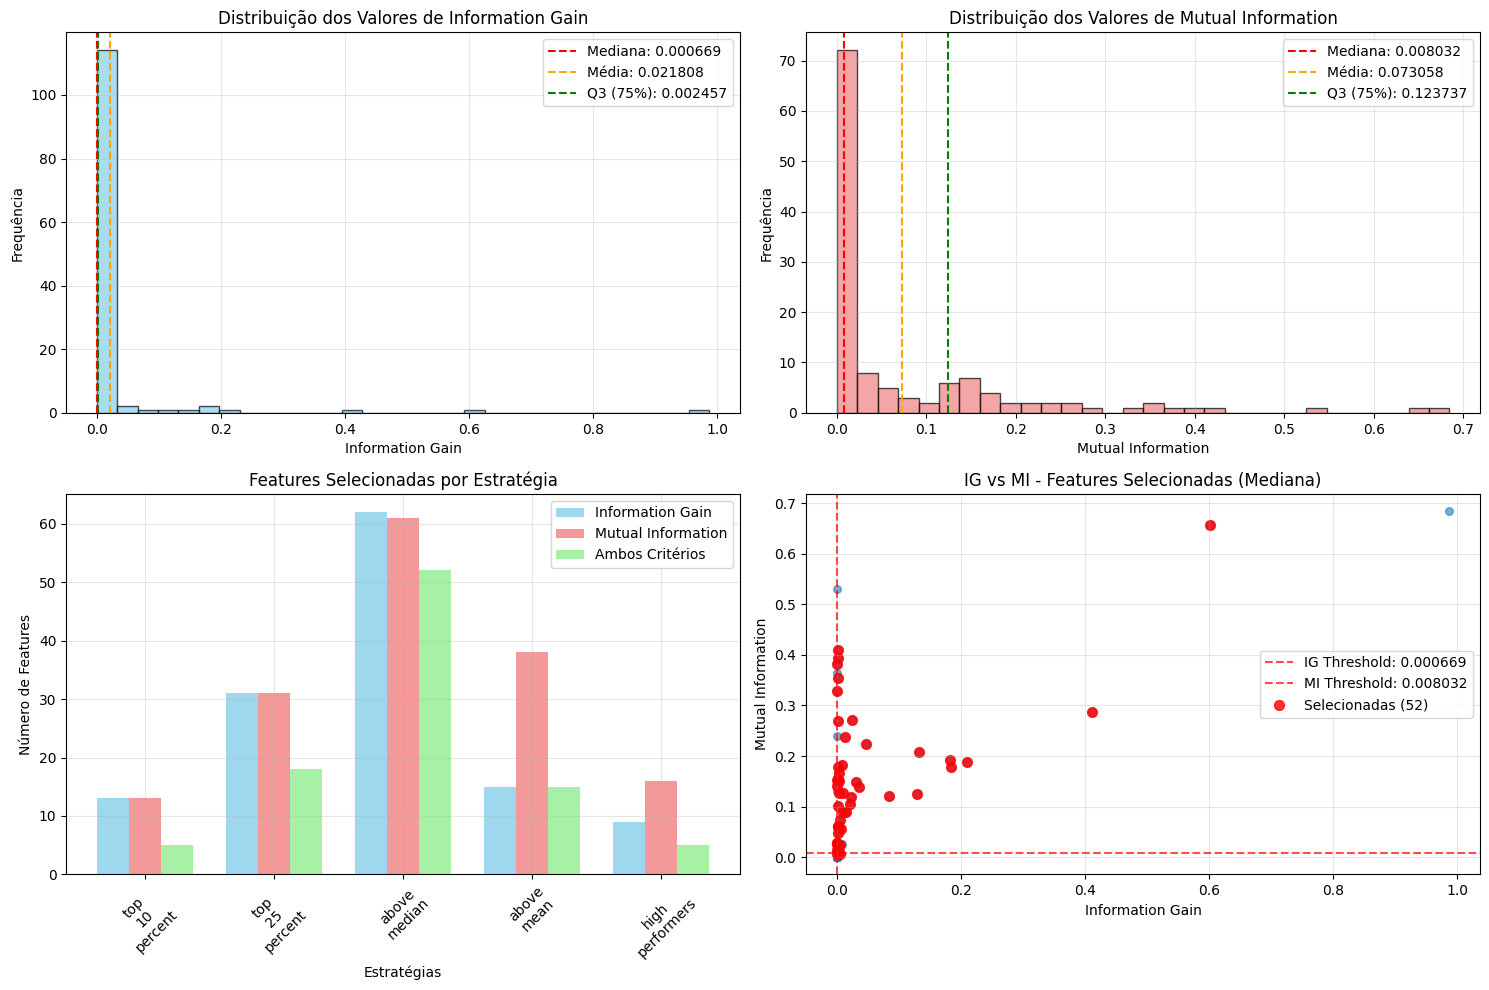


🔧 SELEÇÃO CUSTOMIZADA DE THRESHOLDS
Para usar thresholds customizados, modifique os valores abaixo:

# Exemplo de uso:
custom_ig_threshold = 0.01  # Seu threshold para Information Gain
custom_mi_threshold = 0.01  # Seu threshold para Mutual Information

# Aplicar seleção customizada:
custom_ig_selected = ig_results[ig_results['Information_Gain'] >= custom_ig_threshold]['Feature'].tolist()
custom_mi_selected = mi_results[mi_results['Mutual_Information'] >= custom_mi_threshold]['Feature'].tolist()
custom_both_criteria = list(set(custom_ig_selected) & set(custom_mi_selected))

print(f'Features selecionadas com thresholds customizados: {len(custom_both_criteria)}')


In [ ]:
# Visualização dos Thresholds e Seleção Customizada
print("📊 Visualizando thresholds e permitindo seleção customizada...")

# Verificar se os resultados existem
if 'ig_results' in locals() and 'mi_results' in locals():
    
    # Criar visualização dos thresholds
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Subplot 1: Distribuição do Information Gain com thresholds
    axes[0, 0].hist(ig_results['Information_Gain'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(strategies['above_median']['ig_threshold'], color='red', linestyle='--', 
                       label=f"Mediana: {strategies['above_median']['ig_threshold']:.6f}")
    axes[0, 0].axvline(strategies['above_mean']['ig_threshold'], color='orange', linestyle='--',
                       label=f"Média: {strategies['above_mean']['ig_threshold']:.6f}")
    axes[0, 0].axvline(strategies['top_25_percent']['ig_threshold'], color='green', linestyle='--',
                       label=f"Q3 (75%): {strategies['top_25_percent']['ig_threshold']:.6f}")
    axes[0, 0].set_xlabel('Information Gain')
    axes[0, 0].set_ylabel('Frequência')
    axes[0, 0].set_title('Distribuição dos Valores de Information Gain')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Subplot 2: Distribuição do Mutual Information com thresholds
    axes[0, 1].hist(mi_results['Mutual_Information'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].axvline(strategies['above_median']['mi_threshold'], color='red', linestyle='--',
                       label=f"Mediana: {strategies['above_median']['mi_threshold']:.6f}")
    axes[0, 1].axvline(strategies['above_mean']['mi_threshold'], color='orange', linestyle='--',
                       label=f"Média: {strategies['above_mean']['mi_threshold']:.6f}")
    axes[0, 1].axvline(strategies['top_25_percent']['mi_threshold'], color='green', linestyle='--',
                       label=f"Q3 (75%): {strategies['top_25_percent']['mi_threshold']:.6f}")
    axes[0, 1].set_xlabel('Mutual Information')
    axes[0, 1].set_ylabel('Frequência')
    axes[0, 1].set_title('Distribuição dos Valores de Mutual Information')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Subplot 3: Número de features selecionadas por estratégia
    strategy_names = list(strategies.keys())
    ig_counts = [len(selection_results[s]['ig_selected']) for s in strategy_names]
    mi_counts = [len(selection_results[s]['mi_selected']) for s in strategy_names]
    both_counts = [len(selection_results[s]['both_criteria']) for s in strategy_names]
    
    x = np.arange(len(strategy_names))
    width = 0.25
    
    axes[1, 0].bar(x - width, ig_counts, width, label='Information Gain', alpha=0.8, color='skyblue')
    axes[1, 0].bar(x, mi_counts, width, label='Mutual Information', alpha=0.8, color='lightcoral')
    axes[1, 0].bar(x + width, both_counts, width, label='Ambos Critérios', alpha=0.8, color='lightgreen')
    
    axes[1, 0].set_xlabel('Estratégias')
    axes[1, 0].set_ylabel('Número de Features')
    axes[1, 0].set_title('Features Selecionadas por Estratégia')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([s.replace('_', '\n') for s in strategy_names], rotation=45)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Subplot 4: Scatter plot IG vs MI com thresholds
    axes[1, 1].scatter(combined_results['Information_Gain'], combined_results['Mutual_Information'], 
                       alpha=0.6, s=30)
    
    # Adicionar linhas de threshold da estratégia recomendada
    # Ps tre
    recommended_ig = strategies['above_median']['ig_threshold']
    recommended_mi = strategies['above_median']['mi_threshold']
    
    axes[1, 1].axvline(recommended_ig, color='red', linestyle='--', alpha=0.7, label=f'IG Threshold: {recommended_ig:.6f}')
    axes[1, 1].axhline(recommended_mi, color='red', linestyle='--', alpha=0.7, label=f'MI Threshold: {recommended_mi:.6f}')
    
    # Destacar features selecionadas
    selected_features = recommended['both_criteria']
    if len(selected_features) > 0:
        selected_data = combined_results[combined_results['Feature'].isin(selected_features)]
        axes[1, 1].scatter(selected_data['Information_Gain'], selected_data['Mutual_Information'], 
                          color='red', s=50, alpha=0.8, label=f'Selecionadas ({len(selected_features)})')
    
    axes[1, 1].set_xlabel('Information Gain')
    axes[1, 1].set_ylabel('Mutual Information')
    axes[1, 1].set_title('IG vs MI - Features Selecionadas (Mediana)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*70)
    print("🔧 SELEÇÃO CUSTOMIZADA DE THRESHOLDS")
    print("="*70)
    print("Para usar thresholds customizados, modifique os valores abaixo:")
    print()
    print("# Exemplo de uso:")
    print("custom_ig_threshold = 0.01  # Seu threshold para Information Gain")
    print("custom_mi_threshold = 0.01  # Seu threshold para Mutual Information")
    print()
    print("# Aplicar seleção customizada:")
    print("custom_ig_selected = ig_results[ig_results['Information_Gain'] >= custom_ig_threshold]['Feature'].tolist()")
    print("custom_mi_selected = mi_results[mi_results['Mutual_Information'] >= custom_mi_threshold]['Feature'].tolist()")
    print("custom_both_criteria = list(set(custom_ig_selected) & set(custom_mi_selected))")
    print()
    print("print(f'Features selecionadas com thresholds customizados: {len(custom_both_criteria)}')")
    
else:
    print("❌ Execute primeiro as células de cálculo de IG e MI!")

In [ ]:
# Combina os resultados para comparação
try:
    # Merge dos resultados
    combined_results = ig_results.merge(
        mi_results, 
        on='Feature', 
        how='outer', 
        suffixes=('_IG', '_MI')
    )
    
    print("Comparação entre Information Gain e Mutual Information:")
    print("="*70)
    print(combined_results.head(15))
    
    # Calcula correlação entre as métricas
    if len(combined_results) > 1:
        correlation = combined_results['Information_Gain'].corr(
            combined_results['Mutual_Information']
        )
        print(f"\nCorrelação entre Information Gain e Mutual Information: {correlation:.4f}")
    
except Exception as e:
    print(f"Erro ao combinar resultados: {e}")
    print("\nResultados separados:")
    print("\nInformation Gain:")
    if 'ig_results' in locals():
        print(ig_results.head(10))
    print("\nMutual Information:")
    if 'mi_results' in locals():
        print(mi_results.head(10))

Comparação entre Information Gain e Mutual Information:
                              Feature  Information_Gain  \
0                           iteration          0.008040   
1       mean_container_cpu_nr_periods          0.000000   
2     mean_container_cpu_nr_throttled          0.000000   
3           mean_container_cpu_system          0.002261   
4   mean_container_cpu_throttled_time          0.000000   
5             mean_container_cpu_user          0.003117   
6       mean_container_disk_8:0_async          0.000478   
7     mean_container_disk_8:0_discard          0.000000   
8        mean_container_disk_8:0_read          0.001142   
9        mean_container_disk_8:0_sync          0.001142   
10      mean_container_disk_8:0_total          0.001214   
11      mean_container_disk_8:0_write          0.000478   
12     mean_container_mem_active_anon          0.002942   
13     mean_container_mem_active_file          0.001268   
14           mean_container_mem_cache          0.000498   


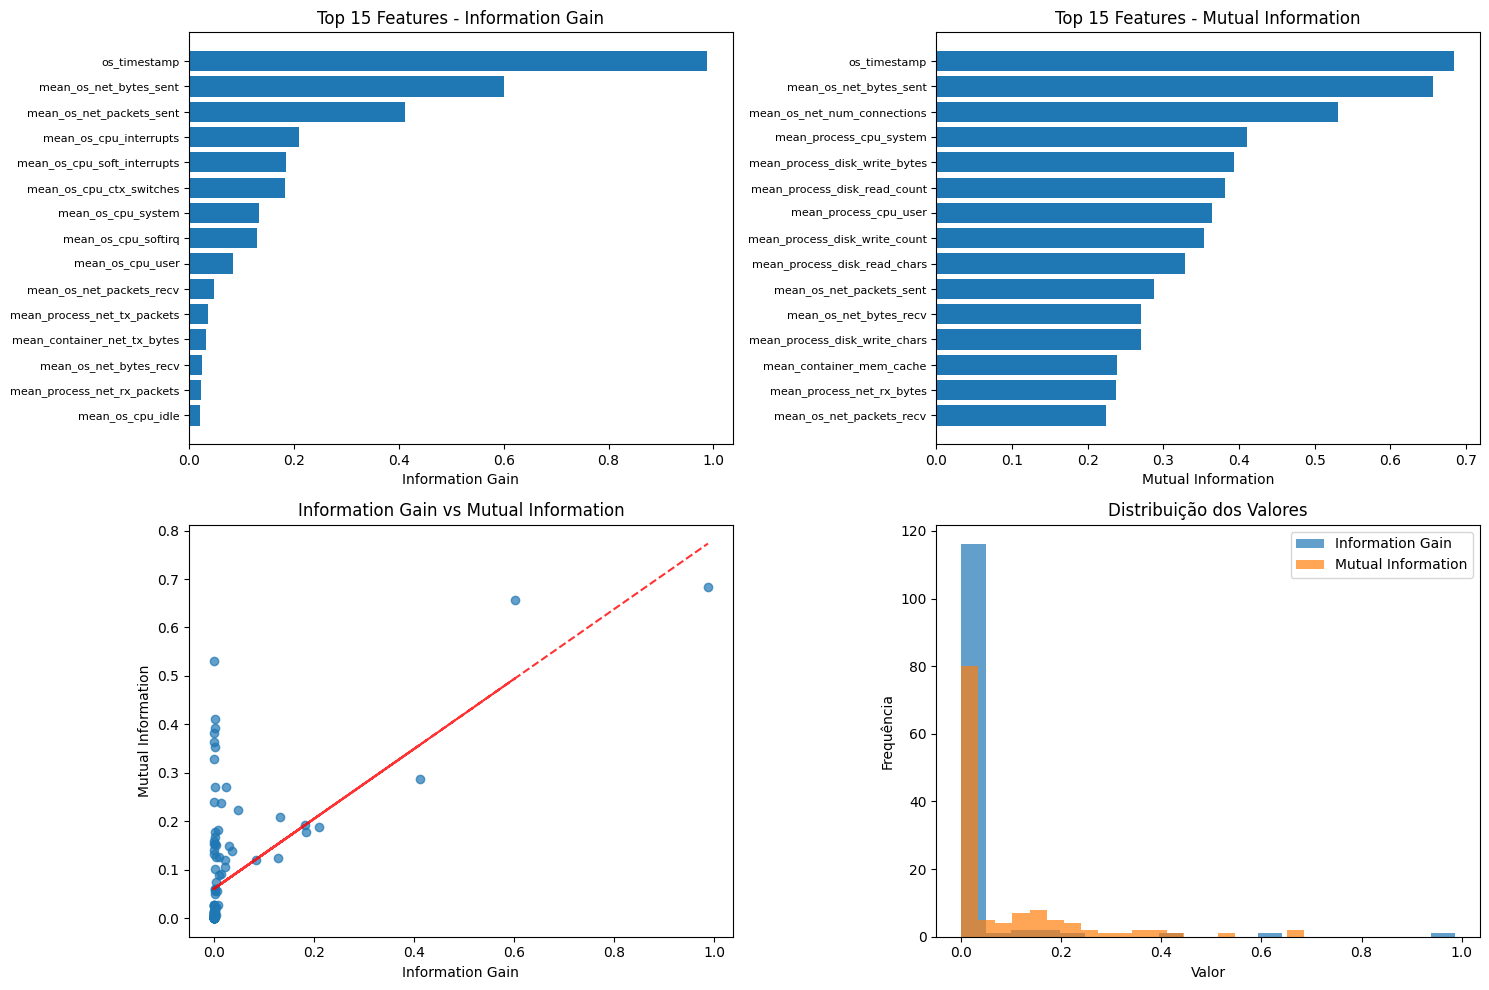

In [ ]:
# Visualizações
plt.figure(figsize=(15, 10))

# Subplot 1: Top 15 features por Information Gain
plt.subplot(2, 2, 1)
if 'ig_results' in locals() and len(ig_results) > 0:
    top_ig = ig_results.head(15)
    plt.barh(range(len(top_ig)), top_ig['Information_Gain'])
    plt.yticks(range(len(top_ig)), top_ig['Feature'], fontsize=8)
    plt.xlabel('Information Gain')
    plt.title('Top 15 Features - Information Gain')
    plt.gca().invert_yaxis()

# Subplot 2: Top 15 features por Mutual Information
plt.subplot(2, 2, 2)
if 'mi_results' in locals() and len(mi_results) > 0:
    top_mi = mi_results.head(15)
    plt.barh(range(len(top_mi)), top_mi['Mutual_Information'])
    plt.yticks(range(len(top_mi)), top_mi['Feature'], fontsize=8)
    plt.xlabel('Mutual Information')
    plt.title('Top 15 Features - Mutual Information')
    plt.gca().invert_yaxis()

# Subplot 3: Correlação entre IG e MI (se disponível)
plt.subplot(2, 2, 3)
try:
    if 'combined_results' in locals() and len(combined_results) > 1:
        plt.scatter(combined_results['Information_Gain'], 
                   combined_results['Mutual_Information'], 
                   alpha=0.7)
        plt.xlabel('Information Gain')
        plt.ylabel('Mutual Information')
        plt.title('Information Gain vs Mutual Information')
        
        # Adiciona linha de tendência
        z = np.polyfit(combined_results['Information_Gain'].fillna(0), 
                      combined_results['Mutual_Information'].fillna(0), 1)
        p = np.poly1d(z)
        plt.plot(combined_results['Information_Gain'].fillna(0), 
                p(combined_results['Information_Gain'].fillna(0)), 
                "r--", alpha=0.8)
    else:
        plt.text(0.5, 0.5, 'Dados não disponíveis\npara correlação', 
                ha='center', va='center', transform=plt.gca().transAxes)
except Exception as e:
    plt.text(0.5, 0.5, f'Erro: {str(e)[:50]}...', 
            ha='center', va='center', transform=plt.gca().transAxes)

# Subplot 4: Distribuição dos valores
plt.subplot(2, 2, 4)
try:
    if 'ig_results' in locals() and 'mi_results' in locals():
        plt.hist(ig_results['Information_Gain'], alpha=0.7, label='Information Gain', bins=20)
        plt.hist(mi_results['Mutual_Information'], alpha=0.7, label='Mutual Information', bins=20)
        plt.xlabel('Valor')
        plt.ylabel('Frequência')
        plt.title('Distribuição dos Valores')
        plt.legend()
    else:
        plt.text(0.5, 0.5, 'Dados não disponíveis', 
                ha='center', va='center', transform=plt.gca().transAxes)
except Exception as e:
    plt.text(0.5, 0.5, f'Erro: {str(e)[:50]}...', 
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

## Salvando os Resultados

In [ ]:
# Salva os resultados em arquivos CSV
try:
    # Salva Information Gain
    if 'ig_results' in locals():
        ig_results.to_csv(f'../dataset/{nome_dataset}_information_gain_results.csv', index=False)
        print(f"✅ Resultados do Information Gain salvos em '../dataset/{nome_dataset}_information_gain_results.csv'")

    # Salva Mutual Information
    if 'mi_results' in locals():
        mi_results.to_csv(f'../dataset/{nome_dataset}_mutual_information_results.csv', index=False)
        print(f"✅ Resultados do Mutual Information salvos em '../dataset/{nome_dataset}_mutual_information_results.csv'")
    
    # Salva resultados combinados se disponível
    if 'combined_results' in locals():
        combined_results.to_csv(f'../dataset/{nome_dataset}_combined_information_results.csv', index=False)
        print(f"✅ Resultados combinados salvos em '../dataset/{nome_dataset}_combined_information_results.csv'")
    
    print("\n📊 Resumo da Análise:")
    print("="*50)
    if 'ig_results' in locals():
        print(f"• Total de features analisadas: {len(ig_results)}")
        print(f"• Feature com maior Information Gain: {ig_results.iloc[0]['Feature']} ({ig_results.iloc[0]['Information_Gain']:.4f})")
    
    if 'mi_results' in locals():
        print(f"• Feature com maior Mutual Information: {mi_results.iloc[0]['Feature']} ({mi_results.iloc[0]['Mutual_Information']:.4f})")
    
    if 'combined_results' in locals() and len(combined_results) > 1:
        correlation = combined_results['Information_Gain'].corr(combined_results['Mutual_Information'])
        print(f"• Correlação entre IG e MI: {correlation:.4f}")
    
except Exception as e:
    print(f"❌ Erro ao salvar resultados: {e}")

print("\n🎉 Análise concluída!")

✅ Resultados do Information Gain salvos em '../dataset/svm_information_gain_results.csv'
✅ Resultados do Mutual Information salvos em '../dataset/svm_mutual_information_results.csv'
✅ Resultados combinados salvos em '../dataset/svm_combined_information_results.csv'

📊 Resumo da Análise:
• Total de features analisadas: 125
• Feature com maior Information Gain: os_timestamp (0.9873)
• Feature com maior Mutual Information: os_timestamp (0.6843)
• Correlação entre IG e MI: 0.6145

🎉 Análise concluída!


## Interpretação dos Resultados

### Information Gain vs Mutual Information

**Information Gain:**
- Mede a redução na entropia quando dividimos o dataset por um atributo
- Valores mais altos indicam maior capacidade de discriminação
- Favorece atributos com mais valores únicos (pode ter viés)

**Mutual Information:**
- Mede a dependência estatística entre variáveis
- Mais robusto para diferentes tipos de variáveis
- Não favorece atributos com mais valores únicos

### Como usar os resultados:
1. **Seleção de Features**: Use as features com maior IG ou MI para modelos de ML
2. **Feature Engineering**: Combine ou transforme features com baixo IG/MI
3. **Análise Exploratória**: Entenda quais variáveis são mais informativas
4. **Redução de Dimensionalidade**: Mantenha apenas as features mais importantes

=== RESULTADOS DO GANHO DE INFORMAÇÃO ===

🏆 TOP 20 FEATURES - INFORMAÇÃO MÚTUA:
 1. os_timestamp                                       | MI: 0.684335
 2. mean_os_net_bytes_sent                             | MI: 0.656118
 3. mean_os_net_num_connections                        | MI: 0.531207
 4. mean_process_cpu_system                            | MI: 0.410743
 5. mean_process_disk_write_bytes                      | MI: 0.393105
 6. mean_process_disk_read_count                       | MI: 0.382106
 7. mean_process_cpu_user                              | MI: 0.363811
 8. mean_process_disk_write_count                      | MI: 0.354120
 9. mean_process_disk_read_chars                       | MI: 0.328370
10. mean_os_net_packets_sent                           | MI: 0.287963
11. mean_os_net_bytes_recv                             | MI: 0.270328
12. mean_process_disk_write_chars                      | MI: 0.269925
13. mean_container_mem_cache                           | MI: 0.239372
14. mean_

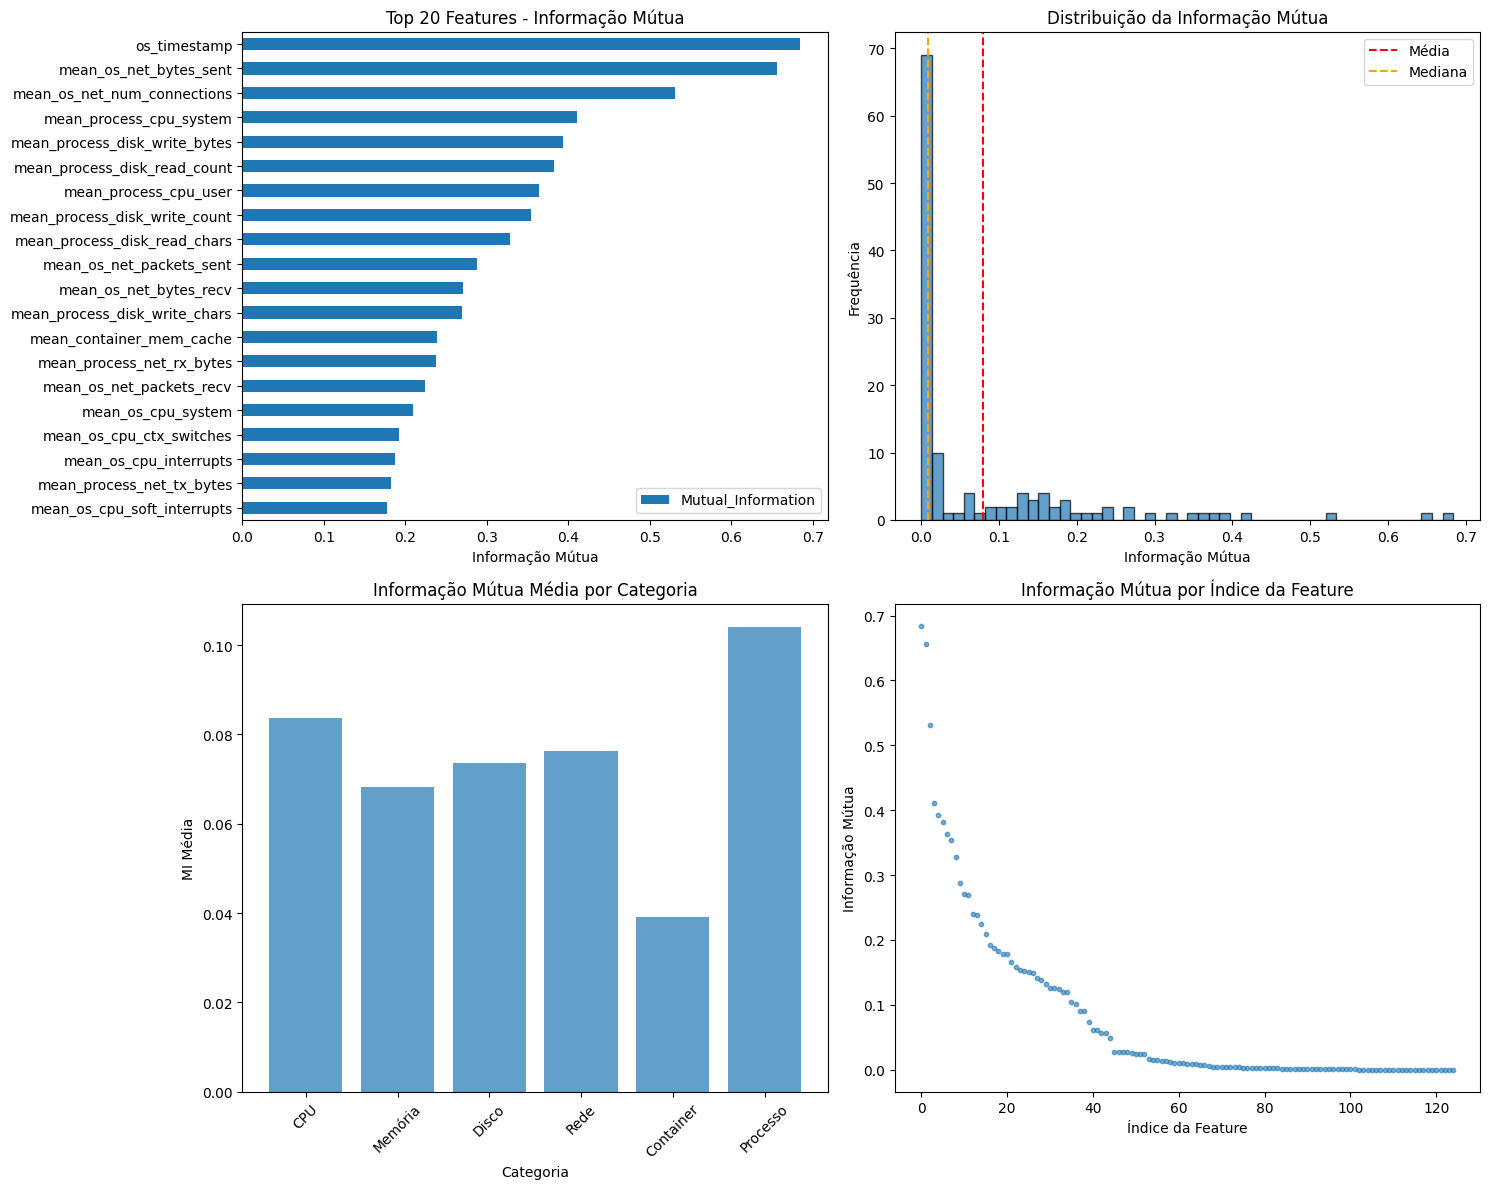

In [ ]:
# Análise e visualização dos resultados
target_column = 'target'  # Substitua pelo nome real da coluna alvo
if target_column is not None and 'mi_results' in locals() and mi_results is not None:
    
    print("=== RESULTADOS DO GANHO DE INFORMAÇÃO ===")
    
    # Top 20 features com maior informação mútua
    print("\n🏆 TOP 20 FEATURES - INFORMAÇÃO MÚTUA:")
    top_20_mi = mi_results.head(20)
    for i, (_, row) in enumerate(top_20_mi.iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<50} | MI: {row['Mutual_Information']:.6f}")
    
    # Estatísticas gerais
    print(f"\n📊 ESTATÍSTICAS GERAIS:")
    print(f"• Total de features analisadas: {len(mi_results)}")
    print(f"• Informação Mútua média: {mi_results['Mutual_Information'].mean():.6f}")
    print(f"• Informação Mútua mediana: {mi_results['Mutual_Information'].median():.6f}")
    print(f"• Desvio padrão: {mi_results['Mutual_Information'].std():.6f}")
    print(f"• Features com MI > 0.01: {(mi_results['Mutual_Information'] > 0.01).sum()}")
    print(f"• Features com MI > 0.1: {(mi_results['Mutual_Information'] > 0.1).sum()}")
    
    # Visualizações
    plt.figure(figsize=(15, 12))
    
    # 1. Top 20 features
    plt.subplot(2, 2, 1)
    top_20_mi.plot(x='Feature', y='Mutual_Information', kind='barh', ax=plt.gca())
    plt.title('Top 20 Features - Informação Mútua')
    plt.xlabel('Informação Mútua')
    plt.ylabel('')
    plt.gca().invert_yaxis()
    
    # 2. Distribuição dos valores de MI
    plt.subplot(2, 2, 2)
    plt.hist(mi_results['Mutual_Information'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(mi_results['Mutual_Information'].mean(), color='red', linestyle='--', label='Média')
    plt.axvline(mi_results['Mutual_Information'].median(), color='orange', linestyle='--', label='Mediana')
    plt.title('Distribuição da Informação Mútua')
    plt.xlabel('Informação Mútua')
    plt.ylabel('Frequência')
    plt.legend()
    
    # 3. Análise por categoria de métrica
    print(f"\n📋 ANÁLISE POR CATEGORIA:")
    
    categorias = {
        'CPU': [col for col in mi_results['Feature'] if 'cpu' in col.lower()],
        'Memória': [col for col in mi_results['Feature'] if 'mem' in col.lower()],
        'Disco': [col for col in mi_results['Feature'] if 'disk' in col.lower()],
        'Rede': [col for col in mi_results['Feature'] if 'net' in col.lower()],
        'Container': [col for col in mi_results['Feature'] if 'container' in col.lower()],
        'Processo': [col for col in mi_results['Feature'] if 'process' in col.lower()]
    }
    
    categoria_scores = {}
    for categoria, features_cat in categorias.items():
        if features_cat:
            scores = mi_results[mi_results['Feature'].isin(features_cat)]['Mutual_Information']
            categoria_scores[categoria] = {
                'count': len(scores),
                'mean': scores.mean(),
                'max': scores.max(),
                'top_feature': mi_results[mi_results['Feature'].isin(features_cat)].iloc[0]['Feature'] if len(scores) > 0 else 'N/A'
            }
            print(f"• {categoria}: {len(scores)} features | Média MI: {scores.mean():.6f} | Max: {scores.max():.6f}")
    
    # 4. MI por categoria
    plt.subplot(2, 2, 3)
    if categoria_scores:
        cats = list(categoria_scores.keys())
        means = [categoria_scores[cat]['mean'] for cat in cats]
        plt.bar(cats, means, alpha=0.7)
        plt.title('Informação Mútua Média por Categoria')
        plt.xlabel('Categoria')
        plt.ylabel('MI Média')
        plt.xticks(rotation=45)
    
    # 5. Scatter plot: MI vs Feature Index
    plt.subplot(2, 2, 4)
    plt.scatter(range(len(mi_results)), mi_results['Mutual_Information'], alpha=0.6, s=10)
    plt.title('Informação Mútua por Índice da Feature')
    plt.xlabel('Índice da Feature')
    plt.ylabel('Informação Mútua')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Resultados não disponíveis para visualização")

## 🚀 Aplicação Prática das Features Selecionadas

Esta seção demonstra como aplicar os resultados da análise de ganho de informação e mutual information na prática, criando datasets reduzidos e fornecendo exemplos de uso em Machine Learning.

In [ ]:
# 1. Criação de Datasets Reduzidos com Features Selecionadas
print("📊 CRIAÇÃO DE DATASETS REDUZIDOS")
print("="*70)

# Verificar se os resultados necessários existem
required_vars = ['ig_results', 'mi_results', 'selection_results']
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print(f"❌ Variáveis necessárias não encontradas: {missing_vars}")
    print("   Execute primeiro as células de análise de ganho de informação!")
else:
    print("✅ Todas as variáveis necessárias encontradas!")
    
    # Usar estratégia recomendada (acima da mediana)
    if 'selection_results' in globals() and 'above_median' in selection_results:
        selected_features = selection_results['above_median']['both_criteria']
        strategy_used = 'above_median'
    else:
        # Fallback: usar top 25% das features por MI
        print("⚠️ Usando estratégia de fallback: top 25% por Mutual Information")
        top_25_count = max(1, len(mi_results) // 4)  # Pelo menos 1 feature
        selected_features = mi_results.head(top_25_count)['Feature'].tolist()
        strategy_used = 'top_25_percent_mi'
    
    print(f"\n🎯 Estratégia utilizada: {strategy_used}")
    print(f"📊 Features selecionadas: {len(selected_features)}")
    print(f"📊 Features originais: {X.shape[1]}")
    print(f"📉 Redução: {(1 - len(selected_features)/X.shape[1])*100:.1f}%")
    
    # Criar datasets reduzidos
    if len(selected_features) > 0:
        print(f"\n🔨 Criando datasets reduzidos...")
        
        # Dataset principal reduzido
        X_selected = X[selected_features].copy()
        
        # Datasets de treinamento reduzidos
        if isinstance(X_train, pd.DataFrame):
            # Se X_train é DataFrame
            available_features = [f for f in selected_features if f in X_train.columns]
            X_train_selected = X_train[available_features].copy()
            X_test_selected = X_test[available_features].copy() if 'X_test' in globals() else None
            X_val_selected = X_val[available_features].copy() if 'X_val' in globals() else None
        else:
            # Se X_train é numpy array, usar índices
            if hasattr(X, 'columns'):
                feature_indices = [i for i, col in enumerate(X.columns) if col in selected_features]
                X_train_selected = X_train[:, feature_indices]
                X_test_selected = X_test[:, feature_indices] if 'X_test' in globals() else None
                X_val_selected = X_val[:, feature_indices] if 'X_val' in globals() else None
            else:
                print("⚠️ Não foi possível criar versões numpy dos datasets de treino")
                X_train_selected = None
                X_test_selected = None
                X_val_selected = None
        
        print(f"✅ Datasets reduzidos criados:")
        print(f"   • X_selected shape: {X_selected.shape}")
        if X_train_selected is not None:
            print(f"   • X_train_selected shape: {X_train_selected.shape}")
        if X_test_selected is not None:
            print(f"   • X_test_selected shape: {X_test_selected.shape}")
        if X_val_selected is not None:
            print(f"   • X_val_selected shape: {X_val_selected.shape}")
        
        # Criar summary das features selecionadas
        print(f"\n📋 Criando summary das features selecionadas...")
        selected_summary_data = []
        
        for feature in selected_features:
            # Obter scores de IG e MI
            ig_score = ig_results[ig_results['Feature'] == feature]['Information_Gain'].iloc[0] if feature in ig_results['Feature'].values else 0
            mi_score = mi_results[mi_results['Feature'] == feature]['Mutual_Information'].iloc[0] if feature in mi_results['Feature'].values else 0
            
            selected_summary_data.append({
                'Feature': feature,
                'Information_Gain': ig_score,
                'Mutual_Information': mi_score,
                'Rank_IG': ig_results[ig_results['Feature'] == feature].index[0] + 1 if feature in ig_results['Feature'].values else len(ig_results) + 1,
                'Rank_MI': mi_results[mi_results['Feature'] == feature].index[0] + 1 if feature in mi_results['Feature'].values else len(mi_results) + 1
            })
        
        selected_features_summary = pd.DataFrame(selected_summary_data)
        selected_features_summary = selected_features_summary.sort_values('Information_Gain', ascending=False)
        
        print(f"✅ Summary criado com {len(selected_features_summary)} features")
        
        # Mostrar top 10 features selecionadas
        print(f"\n🏆 TOP 10 FEATURES SELECIONADAS:")
        print("-" * 70)
        for idx, row in selected_features_summary.head(10).iterrows():
            print(f"   {row['Rank_IG']:2d}. {row['Feature']:30s} | IG: {row['Information_Gain']:.6f} | MI: {row['Mutual_Information']:.6f}")
        
        # Salvar no ambiente global
        globals()['X_selected'] = X_selected
        globals()['selected_features_list'] = selected_features
        globals()['selected_features_summary'] = selected_features_summary
        if X_train_selected is not None:
            globals()['X_train_selected'] = X_train_selected
        if X_test_selected is not None:
            globals()['X_test_selected'] = X_test_selected
        if X_val_selected is not None:
            globals()['X_val_selected'] = X_val_selected
        
        print(f"\n💾 Variáveis criadas no ambiente:")
        print(f"   • X_selected: Dataset principal com features selecionadas")
        print(f"   • selected_features_list: Lista das features selecionadas")
        print(f"   • selected_features_summary: DataFrame com rankings e scores")
        if X_train_selected is not None:
            print(f"   • X_train_selected, X_test_selected, X_val_selected: Conjuntos de treino/teste/validação")
        
    else:
        print("❌ Nenhuma feature selecionada! Verifique os thresholds utilizados.")

📊 CRIAÇÃO DE DATASETS REDUZIDOS
✅ Todas as variáveis necessárias encontradas!

🎯 Estratégia utilizada: above_median
📊 Features selecionadas: 52
📊 Features originais: 125
📉 Redução: 58.4%

🔨 Criando datasets reduzidos...
✅ Datasets reduzidos criados:
   • X_selected shape: (80648, 52)
   • X_train_selected shape: (32259, 52)
   • X_test_selected shape: (24194, 52)
   • X_val_selected shape: (24195, 52)

📋 Criando summary das features selecionadas...
✅ Summary criado com 52 features

🏆 TOP 10 FEATURES SELECIONADAS:
----------------------------------------------------------------------
   42. mean_os_net_bytes_sent         | IG: 0.601333 | MI: 0.656118
   49. mean_os_net_packets_sent       | IG: 0.411035 | MI: 0.287963
    5. mean_os_cpu_interrupts         | IG: 0.209590 | MI: 0.187274
    9. mean_os_cpu_soft_interrupts    | IG: 0.184541 | MI: 0.177985
    1. mean_os_cpu_ctx_switches       | IG: 0.182440 | MI: 0.192530
   13. mean_os_cpu_system             | IG: 0.132827 | MI: 0.208871
  

In [ ]:
# 2. Salvamento de Arquivos
print("\n💾 SALVAMENTO DE ARQUIVOS")
print("="*70)

if 'selected_features_list' in globals() and len(selected_features_list) > 0:
    try:
        import os
        import pickle
        
        # Criar diretório se não existir
        output_dir = '../dataset'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"📁 Diretório criado: {output_dir}")
        
        # 1. Salvar lista de features selecionadas (selected_features.txt)
        features_file = os.path.join(output_dir, 'selected_features.txt')
        with open(features_file, 'w', encoding='utf-8') as f:
            f.write(f"# Features Selecionadas - Análise de Ganho de Informação\n")
            f.write(f"# Data: {pd.Timestamp.now()}\n")
            f.write(f"# Estratégia: {strategy_used}\n")
            f.write(f"# Total de features: {len(selected_features_list)}\n")
            f.write(f"# Redução: {(1 - len(selected_features_list)/X.shape[1])*100:.1f}%\n")
            f.write(f"#\n")
            for i, feature in enumerate(selected_features_list, 1):
                f.write(f"{feature}\n")
        
        print(f"✅ {features_file}")
        print(f"   • {len(selected_features_list)} features salvas")
        
        # 2. Salvar dataset reduzido completo em pickle
        if 'X_selected' in globals():
            dataset_pickle_file = os.path.join(output_dir, f'{nome_dataset}_selected_datasets.pkl')
            
            # Criar dicionário com todos os datasets selecionados
            selected_data = {
                'X_selected': X_selected,
                'selected_features_list': selected_features_list,
                'selected_features_summary': selected_features_summary if 'selected_features_summary' in globals() else None,
                'strategy_used': strategy_used,
                'creation_date': pd.Timestamp.now(),
                'original_shape': X.shape,
                'selected_shape': X_selected.shape,
                'reduction_percentage': (1 - len(selected_features_list)/X.shape[1])*100
            }
            
            # Adicionar conjuntos de treino/teste/validação se disponíveis
            if 'X_train_selected' in globals() and X_train_selected is not None:
                selected_data['X_train_selected'] = X_train_selected
            if 'X_test_selected' in globals() and X_test_selected is not None:
                selected_data['X_test_selected'] = X_test_selected
            if 'X_val_selected' in globals() and X_val_selected is not None:
                selected_data['X_val_selected'] = X_val_selected
            
            # Adicionar targets se disponíveis no ambiente global
            if 'y_train' in globals():
                selected_data['y_train'] = y_train
            if 'y_test' in globals():
                selected_data['y_test'] = y_test
            if 'y_val' in globals():
                selected_data['y_val'] = y_val
            if 'y' in globals():
                selected_data['y'] = y
            
            # Salvar em pickle
            with open(dataset_pickle_file, 'wb') as f:
                pickle.dump(selected_data, f)
            print(f"✅ {dataset_pickle_file}")
            print(f"   • Shape: {X_selected.shape}")
            print(f"   • Tamanho: {os.path.getsize(dataset_pickle_file) / (1024*1024):.2f} MB")
            print(f"   • Conteúdo: {len(selected_data)} objetos salvos")
        
        # 3. Salvar summary com scores em pickle separado
        if 'selected_features_summary' in globals():
            summary_pickle_file = os.path.join(output_dir, f'{nome_dataset}_selected_features_summary.pkl')
            with open(summary_pickle_file, 'wb') as f:
                pickle.dump(selected_features_summary, f)
            print(f"✅ {summary_pickle_file}")
            print(f"   • {len(selected_features_summary)} features com scores e rankings")
        
        # 4. Listar conjuntos salvos no pickle principal
        saved_datasets = []
        if 'X_train_selected' in globals() and X_train_selected is not None:
            saved_datasets.append(f"X_train_selected ({X_train_selected.shape})")
        if 'X_test_selected' in globals() and X_test_selected is not None:
            saved_datasets.append(f"X_test_selected ({X_test_selected.shape})")
        if 'X_val_selected' in globals() and X_val_selected is not None:
            saved_datasets.append(f"X_val_selected ({X_val_selected.shape})")
        
        if saved_datasets:
            print(f"✅ Conjuntos treino/teste/validação (no pickle principal):")
            for dataset_info in saved_datasets:
                print(f"   • {dataset_info}")
        
        # 5. Criar arquivo README com informações atualizadas
        readme_file = os.path.join(output_dir, f'{nome_dataset}_README_selected_features.md')
        with open(readme_file, 'w', encoding='utf-8') as f:
            f.write("# Features Selecionadas - Análise de Ganho de Informação\n\n")
            f.write(f"**Data de criação:** {pd.Timestamp.now()}\n\n")
            f.write(f"**Estratégia utilizada:** {strategy_used}\n\n")
            f.write(f"## Resumo\n\n")
            f.write(f"- **Features originais:** {X.shape[1]}\n")
            f.write(f"- **Features selecionadas:** {len(selected_features_list)}\n")
            f.write(f"- **Redução:** {(1 - len(selected_features_list)/X.shape[1])*100:.1f}%\n\n")
            
            f.write(f"## Arquivos Gerados\n\n")
            f.write(f"1. **selected_features.txt** - Lista simples das features selecionadas\n")
            f.write(f"2. **selected_datasets.pkl** - Arquivo pickle com todos os datasets reduzidos e metadados\n")
            f.write(f"3. **selected_features_summary.pkl** - Scores e rankings detalhados das features (pickle)\n")
            f.write(f"4. **README_selected_features.md** - Este arquivo de documentação\n")
            
            f.write(f"\n## Conteúdo do Arquivo Pickle Principal\n\n")
            f.write(f"O arquivo `selected_datasets.pkl` contém:\n")
            f.write(f"- **X_selected**: Dataset principal com features selecionadas\n")
            f.write(f"- **selected_features_list**: Lista das features selecionadas\n")
            f.write(f"- **selected_features_summary**: DataFrame com scores e rankings\n")
            if saved_datasets:
                f.write(f"- **Conjuntos treino/teste/validação**: Versões reduzidas dos conjuntos\n")
            f.write(f"- **Metadados**: Estratégia usada, data de criação, informações de redução\n")
            
            f.write(f"\n## Top 10 Features\n\n")
            f.write(f"| Rank | Feature | Information Gain | Mutual Information |\n")
            f.write(f"|------|---------|------------------|--------------------|\n")
            if 'selected_features_summary' in globals():
                for idx, row in selected_features_summary.head(10).iterrows():
                    f.write(f"| {row['Rank_IG']:2d} | {row['Feature']} | {row['Information_Gain']:.6f} | {row['Mutual_Information']:.6f} |\n")
            
            f.write(f"\n## Como Usar\n\n")
            f.write(f"```python\n")
            f.write(f"import pandas as pd\n")
            f.write(f"import numpy as np\n")
            f.write(f"import pickle\n\n")
            f.write(f"# Carregar features selecionadas (texto)\n")
            f.write(f"with open('selected_features.txt', 'r') as f:\n")
            f.write(f"    selected_features = [line.strip() for line in f if not line.startswith('#') and line.strip()]\n\n")
            f.write(f"# Carregar todos os datasets e metadados (pickle)\n")
            f.write(f"with open('selected_datasets.pkl', 'rb') as f:\n")
            f.write(f"    data = pickle.load(f)\n\n")
            f.write(f"# Acessar datasets\n")
            f.write(f"X_selected = data['X_selected']\n")
            f.write(f"selected_features = data['selected_features_list']\n")
            f.write(f"summary = data['selected_features_summary']\n\n")
            f.write(f"# Acessar conjuntos de treino/teste (se disponíveis)\n")
            f.write(f"if 'X_train_selected' in data:\n")
            f.write(f"    X_train_selected = data['X_train_selected']\n")
            f.write(f"    y_train = data.get('y_train', None)\n\n")
            f.write(f"# Carregar summary separado (pickle)\n")
            f.write(f"with open('selected_features_summary.pkl', 'rb') as f:\n")
            f.write(f"    summary_df = pickle.load(f)\n")
            f.write(f"```\n")
        
        print(f"✅ {readme_file}")
        print(f"   • Documentação completa criada")
        
        print(f"\n📊 RESUMO DE ARQUIVOS SALVOS:")
        print(f"   • Total de arquivos: 4 (TXT + PKL principal + PKL summary + README)")
        print(f"   • Formato principal: Pickle (mais eficiente e preserva tipos)")
        print(f"   • Diretório: {os.path.abspath(output_dir)}")
        
        print(f"\n🔍 VANTAGENS DO FORMATO PICKLE:")
        print(f"   • Preserva tipos de dados originais (DataFrame, numpy arrays)")
        print(f"   • Carregamento mais rápido que CSV")
        print(f"   • Menor tamanho de arquivo")
        print(f"   • Suporte nativo a objetos Python complexos")
        print(f"   • Metadados incluídos no mesmo arquivo")
        
    except Exception as e:
        print(f"❌ Erro ao salvar arquivos: {e}")
        print(f"   Verifique permissões de escrita no diretório {output_dir}")

else:
    print("❌ Nenhuma feature selecionada para salvar!")


💾 SALVAMENTO DE ARQUIVOS
✅ ../dataset\selected_features.txt
   • 52 features salvas
✅ ../dataset\svm_selected_datasets.pkl
   • Shape: (80648, 52)
   • Tamanho: 65.62 MB
   • Conteúdo: 15 objetos salvos
✅ ../dataset\svm_selected_features_summary.pkl
   • 52 features com scores e rankings
✅ Conjuntos treino/teste/validação (no pickle principal):
   • X_train_selected ((32259, 52))
   • X_test_selected ((24194, 52))
   • X_val_selected ((24195, 52))
✅ ../dataset\svm_README_selected_features.md
   • Documentação completa criada

📊 RESUMO DE ARQUIVOS SALVOS:
   • Total de arquivos: 4 (TXT + PKL principal + PKL summary + README)
   • Formato principal: Pickle (mais eficiente e preserva tipos)
   • Diretório: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justiça\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon\dataset

🔍 VANTAGENS DO FORMATO PICKLE:
   • Preserva tipos de dados originais (DataFrame, numpy arrays)
   • Carregamento mais rápido que CSV
   • Menor tamanho d

In [ ]:
# 2. Atualizar dataset pickle original com datasets reduzidos
print("\n💾 ATUALIZAÇÃO DO DATASET PICKLE ORIGINAL")
#             
with open(arq_dataset_pkl, 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'X_test': X_test,
        'X_val': X_val,
        'y_train': y_train,
        'y_test': y_test,
        'y_val': y_val,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'X_val_scaled': X_val_scaled,
        'classes_mapping': classes_mapping, 
        'features_ganho_informacao': selected_features_list if 'selected_features_list' in globals() else None
    }, f)

# Mostrar os dado de feature_ganho_informacao salvos
if 'selected_features_list' in globals():
    print(f"✅ Dataset pickle atualizado com 'features_ganho_informacao' ({len(selected_features_list)} features)")
    print(f"   • Arquivo: {arq_dataset_pkl}")
    print(f"   • Caminho absoluto: {os.path.abspath(arq_dataset_pkl)}")


💾 ATUALIZAÇÃO DO DATASET PICKLE ORIGINAL
✅ Dataset pickle atualizado com 'features_ganho_informacao' (52 features)
   • Arquivo: ../dataset/svm.pkl
   • Caminho absoluto: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justiça\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon\dataset\svm.pkl
✅ Dataset pickle atualizado com 'features_ganho_informacao' (52 features)
   • Arquivo: ../dataset/svm.pkl
   • Caminho absoluto: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justiça\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon\dataset\svm.pkl


In [ ]:
# 3. Exemplos de Uso em Machine Learning
print("\n🤖 EXEMPLOS DE USO EM MACHINE LEARNING")
print("="*70)

if 'X_selected' in globals() and 'y' in globals():
    
    print("📚 Exemplo 1: Comparação de Performance - Dataset Completo vs Reduzido")
    print("-" * 60)
    
    # Código de exemplo para comparar performance
    example_code_1 = '''
# Importações necessárias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# 1. Dataset completo
print("🔍 Testando dataset completo...")
X_full = X  # Todas as features
y_target = y

# Divisão treino/teste
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset completo
start_time = time.time()
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_full_train, y_full_train)
full_train_time = time.time() - start_time

# Predição com dataset completo
y_full_pred = rf_full.predict(X_full_test)
full_accuracy = accuracy_score(y_full_test, y_full_pred)

print(f"   • Features: {X_full.shape[1]}")
print(f"   • Tempo de treino: {full_train_time:.2f}s")
print(f"   • Acurácia: {full_accuracy:.4f}")

# 2. Dataset reduzido
print("\\n🎯 Testando dataset reduzido...")
X_reduced = X_selected  # Apenas features selecionadas
y_target = y

# Divisão treino/teste
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    X_reduced, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset reduzido
start_time = time.time()
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_red_train, y_red_train)
reduced_train_time = time.time() - start_time

# Predição com dataset reduzido
y_red_pred = rf_reduced.predict(X_red_test)
reduced_accuracy = accuracy_score(y_red_test, y_red_pred)

print(f"   • Features: {X_reduced.shape[1]}")
print(f"   • Tempo de treino: {reduced_train_time:.2f}s")
print(f"   • Acurácia: {reduced_accuracy:.4f}")

# 3. Comparação
print("\\n📊 COMPARAÇÃO DE RESULTADOS:")
print(f"   • Redução de features: {(1 - X_reduced.shape[1]/X_full.shape[1])*100:.1f}%")
print(f"   • Speedup no treino: {full_train_time/reduced_train_time:.2f}x")
print(f"   • Diferença de acurácia: {(reduced_accuracy - full_accuracy)*100:.2f}%")
'''
    
    print("💡 CÓDIGO EXEMPLO 1 (copie e execute em uma nova célula):")
    print(example_code_1)
    
    print("\n" + "-" * 60)
    print("📚 Exemplo 2: Pipeline Completo com Features Selecionadas")
    print("-" * 60)
    
    example_code_2 = '''
# Pipeline completo com validação cruzada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Definir modelos para testar
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Configurar validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testar cada modelo com features selecionadas
print("🧪 Testando modelos com features selecionadas...")
results = {}

for model_name, model in models.items():
    # Criar pipeline com normalização
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Validação cruzada
    cv_scores = cross_val_score(pipeline, X_selected, y, cv=cv, scoring='accuracy')
    
    results[model_name] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std(),
        'scores': cv_scores
    }
    
    print(f"   • {model_name:20s}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Encontrar melhor modelo
best_model = max(results.keys(), key=lambda k: results[k]['mean_accuracy'])
print(f"\\n🏆 Melhor modelo: {best_model}")
print(f"   • Acurácia: {results[best_model]['mean_accuracy']:.4f} ± {results[best_model]['std_accuracy']:.4f}")
'''
    
    print("💡 CÓDIGO EXEMPLO 2 (copie e execute em uma nova célula):")
    print(example_code_2)
    
    print("\n" + "-" * 60)
    print("📚 Exemplo 3: Carregamento e Uso dos Arquivos Salvos")
    print("-" * 60)
    
    example_code_3 = '''
# Como carregar e usar os arquivos salvos (FORMATO PICKLE)
import pandas as pd
import numpy as np
import pickle

# 1. Carregar lista de features selecionadas (texto)
def load_selected_features(filename='../dataset/selected_features.txt'):
    with open(filename, 'r', encoding='utf-8') as f:
        features = []
        for line in f:
            line = line.strip()
            # Ignorar linhas de comentário e vazias
            if line and not line.startswith('#'):
                features.append(line)
    return features

# 2. Carregar todos os datasets e metadados (pickle principal)
def load_selected_datasets(filename='../dataset/selected_datasets.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# 3. Carregar summary das features (pickle separado)
def load_features_summary(filename='../dataset/selected_features_summary.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Exemplo de uso
try:
    # Carregar dados
    selected_features = load_selected_features()  # Lista de features (TXT)
    data = load_selected_datasets()  # Todos os datasets (PICKLE)
    features_summary = load_features_summary()  # Summary (PICKLE)
    
    # Extrair dados do pickle
    X_reduced_loaded = data['X_selected']
    metadata = {
        'strategy': data['strategy_used'],
        'creation_date': data['creation_date'],
        'reduction': data['reduction_percentage']
    }
    
    print(f"✅ Dados carregados com sucesso!")
    print(f"   • Features selecionadas: {len(selected_features)}")
    print(f"   • Shape do dataset: {X_reduced_loaded.shape}")
    print(f"   • Estratégia usada: {metadata['strategy']}")
    print(f"   • Redução: {metadata['reduction']:.1f}%")
    
    # Verificar se há conjuntos de treino/teste
    if 'X_train_selected' in data:
        print(f"   • Treino disponível: {data['X_train_selected'].shape}")
    if 'X_test_selected' in data:
        print(f"   • Teste disponível: {data['X_test_selected'].shape}")
    
    print(f"   • Top 5 features por IG:")
    for idx, row in features_summary.head(5).iterrows():
        print(f"     {idx+1}. {row['Feature']} (IG: {row['Information_Gain']:.6f})")
        
except FileNotFoundError as e:
    print(f"❌ Arquivo não encontrado: {e}")
    print("   Execute primeiro a célula de salvamento de arquivos!")
except Exception as e:
    print(f"❌ Erro ao carregar pickle: {e}")
    print("   Verifique se os arquivos foram salvos corretamente!")

# 4. Aplicar seleção de features em novos dados
def apply_feature_selection(new_data, selected_features):
    """
    Aplica a seleção de features em um novo dataset
    """
    available_features = [f for f in selected_features if f in new_data.columns]
    missing_features = [f for f in selected_features if f not in new_data.columns]
    
    if missing_features:
        print(f"⚠️ Features não encontradas: {len(missing_features)}")
        print(f"   Usando {len(available_features)} de {len(selected_features)} features")
    
    return new_data[available_features]

# Exemplo de uso com novos dados
# new_X_reduced = apply_feature_selection(new_dataset, selected_features)
'''
    
    print("💡 CÓDIGO EXEMPLO 3 (copie e execute em uma nova célula):")
    print(example_code_3)
    
    print(f"\n🎯 PRÓXIMOS PASSOS RECOMENDADOS:")
    print("=" * 50)
    print("1. 📊 Execute os exemplos acima em células separadas")
    print("2. 🔍 Compare performance entre dataset completo e reduzido")
    print("3. 🧪 Teste diferentes algoritmos com as features selecionadas")
    print("4. 📈 Analise feature importance dos modelos treinados")
    print("5. 🔄 Ajuste thresholds se necessário para melhor performance")
    print("6. 💾 Documente os resultados para uso futuro")
    
    print(f"\n✨ VARIÁVEIS DISPONÍVEIS NO AMBIENTE:")
    available_vars = []
    for var_name in ['X_selected', 'selected_features_list', 'selected_features_summary', 
                     'X_train_selected', 'X_test_selected', 'X_val_selected']:
        if var_name in globals():
            available_vars.append(var_name)
    
    for var in available_vars:
        var_obj = globals()[var]
        if hasattr(var_obj, 'shape'):
            print(f"   • {var}: shape {var_obj.shape}")
        else:
            print(f"   • {var}: {type(var_obj).__name__} com {len(var_obj)} itens")

else:
    print("❌ Datasets necessários não encontrados!")
    print("   Execute primeiro as células anteriores para criar X_selected e y")


🤖 EXEMPLOS DE USO EM MACHINE LEARNING
📚 Exemplo 1: Comparação de Performance - Dataset Completo vs Reduzido
------------------------------------------------------------
💡 CÓDIGO EXEMPLO 1 (copie e execute em uma nova célula):

# Importações necessárias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# 1. Dataset completo
print("🔍 Testando dataset completo...")
X_full = X  # Todas as features
y_target = y

# Divisão treino/teste
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset completo
start_time = time.time()
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_full_train, y_full_train)
full_train_time = time.time() - start_time

# Pre

In [ ]:
# 4. Demonstração de Carregamento dos Arquivos Pickle
print("\n📦 DEMONSTRAÇÃO DE CARREGAMENTO DOS ARQUIVOS PICKLE")
print("="*70)

# Simulação de como carregar os arquivos salvos
try:
    import pickle
    import os
    
    # Verificar se os arquivos existem
    pickle_file = f'../dataset/{nome_dataset}_selected_datasets.pkl'
    summary_file = f'../dataset/{nome_dataset}_selected_features_summary.pkl'
    features_file = f'../dataset/{nome_dataset}_selected_features.txt'

    files_exist = {
        'pickle_principal': os.path.exists(pickle_file),
        'pickle_summary': os.path.exists(summary_file),
        'features_txt': os.path.exists(features_file)
    }
    
    print("🔍 Verificando arquivos salvos:")
    for file_type, exists in files_exist.items():
        status = "✅ Existe" if exists else "❌ Não encontrado"
        print(f"   • {file_type}: {status}")
    
    if files_exist['pickle_principal']:
        print(f"\n📊 CARREGANDO ARQUIVO PICKLE PRINCIPAL...")
        
        # Carregar arquivo pickle principal
        with open(pickle_file, 'rb') as f:
            loaded_data = pickle.load(f)
        
        print(f"✅ Arquivo carregado com sucesso!")
        print(f"   • Chaves disponíveis: {list(loaded_data.keys())}")
        print(f"   • Estratégia usada: {loaded_data.get('strategy_used', 'N/A')}")
        print(f"   • Data de criação: {loaded_data.get('creation_date', 'N/A')}")
        print(f"   • Redução: {loaded_data.get('reduction_percentage', 0):.1f}%")
        
        # Verificar datasets disponíveis
        X_loaded = loaded_data.get('X_selected', None)
        if X_loaded is not None:
            print(f"   • X_selected shape: {X_loaded.shape}")
        
        if 'X_train_selected' in loaded_data:
            print(f"   • X_train_selected shape: {loaded_data['X_train_selected'].shape}")
        
        if 'X_test_selected' in loaded_data:
            print(f"   • X_test_selected shape: {loaded_data['X_test_selected'].shape}")
        
        if 'X_val_selected' in loaded_data:
            print(f"   • X_val_selected shape: {loaded_data['X_val_selected'].shape}")
        
        # Mostrar features selecionadas
        features_from_pickle = loaded_data.get('selected_features_list', [])
        print(f"   • Features selecionadas: {len(features_from_pickle)}")
        if len(features_from_pickle) > 0:
            print(f"   • Primeiras 5 features: {features_from_pickle[:5]}")
    
    if files_exist['pickle_summary']:
        print(f"\n📋 CARREGANDO SUMMARY (PICKLE)...")
        
        # Carregar summary
        with open(summary_file, 'rb') as f:
            summary_loaded = pickle.load(f)
        
        print(f"✅ Summary carregado!")
        print(f"   • Tipo: {type(summary_loaded)}")
        print(f"   • Shape: {summary_loaded.shape}")
        print(f"   • Colunas: {list(summary_loaded.columns)}")
        
        # Top 3 features
        print(f"\n🏆 TOP 3 FEATURES (do pickle):")
        for idx, row in summary_loaded.head(3).iterrows():
            print(f"   {idx+1}. {row['Feature']}")
            print(f"      • IG: {row['Information_Gain']:.6f}")
            print(f"      • MI: {row['Mutual_Information']:.6f}")
    
    if files_exist['features_txt']:
        print(f"\n📄 CARREGANDO LISTA DE FEATURES (TXT)...")
        
        # Carregar lista simples
        with open(features_file, 'r', encoding='utf-8') as f:
            features_txt = []
            for line in f:
                line = line.strip()
                if line and not line.startswith('#'):
                    features_txt.append(line)
        
        print(f"✅ Lista carregada!")
        print(f"   • Total de features: {len(features_txt)}")
        if len(features_txt) > 0:
            print(f"   • Primeiras 3: {features_txt[:3]}")
    
    print(f"\n💡 CÓDIGO DE EXEMPLO PARA USO:")
    print("-" * 50)
    example_usage = '''
# Exemplo completo de carregamento
import pickle
import pandas as pd

# Carregar todos os dados
with open('../dataset/selected_datasets.pkl', 'rb') as f:
    data = pickle.load(f)

# Extrair datasets
X_selected = data['X_selected']
X_train_selected = data.get('X_train_selected', None)
y_train = data.get('y_train', None)

# Usar em ML
from sklearn.ensemble import RandomForestClassifier
if X_train_selected is not None and y_train is not None:
    rf = RandomForestClassifier()
    rf.fit(X_train_selected, y_train)
    print(f"Modelo treinado com {X_train_selected.shape[1]} features!")
'''
    print(example_usage)
    
except Exception as e:
    print(f"❌ Erro na demonstração: {e}")
    print("   Execute primeiro a célula de salvamento para criar os arquivos pickle!")

print(f"\n🚀 PRÓXIMOS PASSOS:")
print("1. Execute a célula de salvamento (célula anterior)")
print("2. Execute esta célula para verificar o carregamento")
print("3. Use os exemplos de código para trabalhar com os dados")
print("4. Aproveite os benefícios do formato pickle! 🎉")


📦 DEMONSTRAÇÃO DE CARREGAMENTO DOS ARQUIVOS PICKLE
🔍 Verificando arquivos salvos:
   • pickle_principal: ✅ Existe
   • pickle_summary: ❌ Não encontrado
   • features_txt: ❌ Não encontrado

📊 CARREGANDO ARQUIVO PICKLE PRINCIPAL...
✅ Arquivo carregado com sucesso!
   • Chaves disponíveis: ['X_selected', 'selected_features_list', 'selected_features_summary', 'strategy_used', 'creation_date', 'original_shape', 'selected_shape', 'reduction_percentage', 'X_train_selected', 'X_test_selected', 'X_val_selected', 'y_train', 'y_test', 'y_val', 'y']
   • Estratégia usada: above_median
   • Data de criação: 2025-10-12 01:32:27.069870
   • Redução: 58.4%
   • X_selected shape: (80648, 52)
   • X_train_selected shape: (32259, 52)
   • X_test_selected shape: (24194, 52)
   • X_val_selected shape: (24195, 52)
   • Features selecionadas: 52
   • Primeiras 5 features: ['mean_process_net_tx_bytes', 'mean_container_net_tx_packets', 'mean_os_mem_pgfree', 'mean_process_net_rx_bytes', 'mean_container_mem_act